# ÌÉúÏñë ÌùëÏ†ê data Î∂ÑÏÑù  Î∞è ADF (Augmented Dickey‚ÄìFuller) Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## ÌÉúÏñë ÌùëÏ†ê data Ïùò Í≥ÑÏ†àÏÑ±, ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù

- 1749 ÎÖÑ Î∂ÄÌÑ∞ Îß§Ïõî Îßê ÌùëÏ†ê Í∞ØÏàòÎ•º Í∏∞Î°ùÌïú data  

- pandas asfreq - TimeSeries Î•º ÌäπÏ†ïÌïú frequency Î°ú ÌëúÏãú
```
    - Week	'W'	one week  
    - WeekOfMonth	'WOM'	  
    - MonthEnd	'M'	calendar month end
    - QuarterEnd	'Q'	calendar quarter end  
    - YearEnd	'A'	calendar year end  
    - Day	'D'	one absolute day
    - Hour	'H'	one hour
    - Minute	'T' or 'min'	one minute
    - Second	'S'	one second
```

In [2]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/Sunspots.csv'
df = pd.read_csv(url, skiprows=0, index_col=0) # Ï≤´ Ï§ÑÏùÄ headerÏù¥ÎØÄÎ°ú skip 
df.head()

Date  Monthly Mean Total Sunspot Number
0  1749-01-31                               96.7
1  1749-02-28                              104.3
2  1749-03-31                              116.7
3  1749-04-30                               92.8
4  1749-05-31                              141.7

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 0 to 3234
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3235 non-null   object 
 1   Monthly Mean Total Sunspot Number  3235 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.8+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3235 entries, 1749-01-31 to 2018-07-31
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3235 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


In [5]:
series = df["Monthly Mean Total Sunspot Number"].asfreq("1M")
series.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Freq: M, Name: Monthly Mean Total Sunspot Number, dtype: float64

<AxesSubplot:xlabel='Date'>

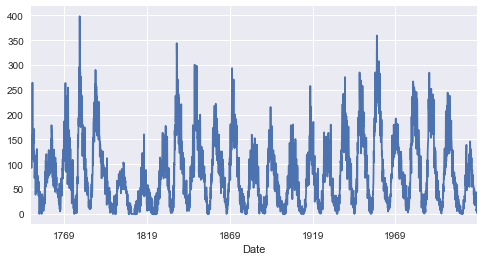

In [6]:
series.plot(figsize=(8, 4))

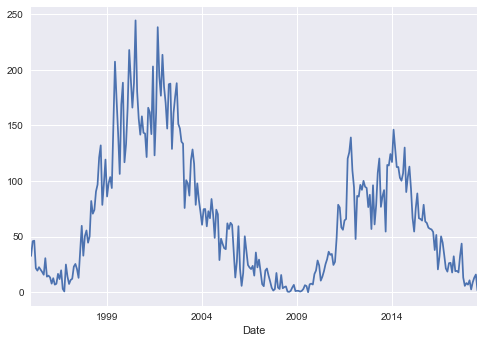

In [7]:
series["1995-01-01":].plot();

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

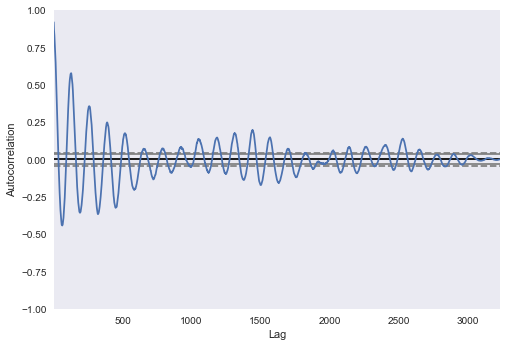

In [8]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

# Augmented Dickey Fuller test

- Ïú°ÏïàÏúºÎ°ú time series Ïùò ÏïàÏ†ïÏÑ± (stationary) Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÎäî Í≤ÉÏùÄ Ïñ¥Î†§Ïö∞ÎØÄÎ°ú library ÏÇ¨Ïö©  


    - statsmodel Ïùò Time Series Analysis (tsa) library ÏÇ¨Ïö©  
    - statsmodels.tsa Îäî time series analysis Ïóê Ïú†Ïö©Ìïú Ìï®ÏàòÎì§ Ï†úÍ≥µ


- ADF Test
    - https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
    
- Î∞òÌôòÍ∞í
    - adf : Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ
    - p-value : p-value Ï∂îÏ†ïÏπò
    - critical values : 1%, 5%, 10% ÏàòÏ§ÄÏóê Ìï¥ÎãπÎêòÎäî Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâÏùò Í∞í

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_check(ts):
    result = adfuller(ts)
    print('ADF Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : {:f}'.format(result[0]))
    print('p-value: {:f} - {}'.format(result[1], 
                        'Non-stationary' if result[1] > 0.05 else 'Stationary'))
    print('Critical Values:')
    for k,v in result[4].items():
        print('\t{}: {:.3f}'.format(k, v))

- ÌÉúÏñë ÌùëÏ†ê dataÏùò Ï†ïÏÉÅÏÑ± check

In [10]:
X = series.values.reshape((-1, 1))

adf_check(X[:,0])

ADF Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : -10.492562
p-value: 0.000000 - Stationary
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


- ADF Statistics < Critical Value 1% Ïù¥ÎØÄÎ°ú ÏòÅÍ∞ÄÏÑ§ÏùÑ Ïú†ÏùòÏàòÏ§Ä 1% ÎØ∏ÎßåÏúºÎ°ú reject Ìï† Ïàò ÏûàÎã§. (Ï¶â, ÌãÄÎ¶¥ÌôïÎ•† 1% ÎØ∏Îßå)

- p-value < 0.05 Ïù¥ÎØÄÎ°ú H0 (non-stationary) Í∏∞Í∞Å -> H1(stationary) Ï±ÑÌÉù

## Time series Î∂ÑÌï¥

### Component Type

- Ï≤¥Í≥ÑÏ†Å Íµ¨ÏÑ± ÏöîÏÜå (systematic components)   
    Level : seriesÏùò ÌèâÍ∑†Í∞í(moving average).  
    Trend : Ïó∞ÏÜçÎêú time pointÎì§ Í∞ÑÏùò value change. Í∏∞Ïö∏Í∏∞ Ï°¥Ïû¨.  
    Seasonality(periodic) : Îã®Í∏∞Ï†Å cycleÏùÑ Î∞òÎ≥µÌïòÎ©∞ ÌèâÍ∑†ÏóêÏÑú Î≤óÏñ¥ÎÇòÎäî Í≤É.  
    

- ÎπÑÏ≤¥Í≥ÑÏ†Å Íµ¨ÏÑ± ÏöîÏÜå (non-systematic components)  
    Noise (Residual)
    
    
- Additive model  

    - ùë¶(ùë°)=ùëôùëíùë£ùëíùëô + ùë°ùëüùëíùëõùëë + ùë†ùëíùëéùë†ùëúùëõùëéùëôùëñùë°ùë¶ + ùëõùëúùëñùë†ùëí Ïùò ÌòïÌÉúÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÌïú Î™®Îç∏  
    - Linear model - Î≥ÄÌôîÍ∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Í≥†Î•¥Í≤å ÏùºÏñ¥ÎÇ®   
    - linear trend, linear seasonality  
    

- Multiplicative model  

    - ùë¶(ùë°)=ùëôùëíùë£ùëíùëô ‚àó ùë°ùëüùëíùëõùëë ‚àó ùë†ùëíùëéùë†ùëúùëõùëéùëôùëñùë°ùë¶ ‚àó ùëõùëúùëñùë†ùëí Ïùò ÌòïÌÉúÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÌïú Î™®Îç∏    
    - Non-linear model - Quadratice ÎòêÎäî exponential Î≥ÄÌôîÍ∞Ä ÏùºÏñ¥ÎÇòÎäî Í≥≥Ïóê Ïì∞ÏûÑ   
    - non-linear trend, non-linear seasonality  
    - Multiplicative modelÏùÄ dataÏóê 0Ïù¥ ÏûàÏúºÎ©¥ ÏïàÎêúÎã§. 0Ïù¥ Ï°¥Ïû¨ÌïòÎ©¥ dataÎ•º Î∂ÑÌï¥Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.   
    - Ï£ºÏãù, Í≤ΩÏ†ú ÏßÄÌëú Í¥ÄÎ†® ÌÉÄÏûÑÏãúÎ¶¨Ï¶àÎäî ÎπÑÏÑ†ÌòïÏóê Í∞ÄÍπåÏõÄ

1950 - 2019 ÏÇ¨Ïù¥Ïùò Í∏à ÏãúÏÑ∏Î•º Ïù¥Ïö©ÌïòÏó¨ Time Series Î∂ÑÌï¥

In [11]:
df = pd.read_csv("datasets/annual_csv.csv", index_col=0, parse_dates=True)
df

Price
Date                
1950-12-01    34.720
1951-12-01    34.660
1952-12-01    34.790
1953-12-01    34.850
1954-12-01    35.040
...              ...
2015-12-01  1068.317
2016-12-01  1152.165
2017-12-01  1265.674
2018-12-01  1249.887
2019-12-01  1480.025

[70 rows x 1 columns]

Ïù¥ÎèôÌèâÍ∑†ÏÑ† ÏûëÏÑ±

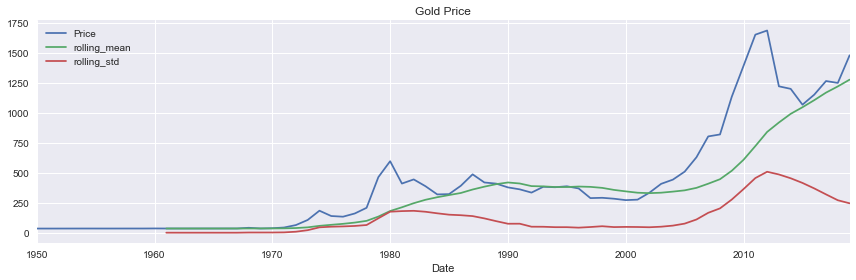

In [12]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.Price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.Price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price', figsize=(12, 4))

plt.tight_layout()
plt.show()

## `multiplicative model`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ seasonality Î∂ÑÌï¥

- priceÍ∞Ä multiplicative model typeÏù¥Îùº Í∞ÄÏ†ïÌïòÍ≥† `multiplicative decomposition` ÏàòÌñâ

- `seasonal_decompose()`Ïùò Í≤∞Í≥ºÎ•º plotÌïòÎ©¥ 4Í∞úÏùò sub-plot ÏÉùÏÑ±
    1. Observed - original price
    2. Trend
    3. Seasonality
    4. Residual

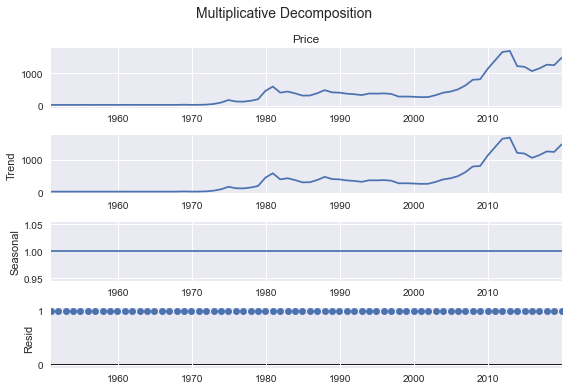

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df.Price, model='multiplicative')

results.plot().suptitle('Multiplicative Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

### `additive model`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ seasonality Î∂ÑÌï¥

- priceÍ∞Ä multiplicative model typeÏù¥Îùº Í∞ÄÏ†ïÌïòÍ≥† `additive decomposition` ÏàòÌñâ

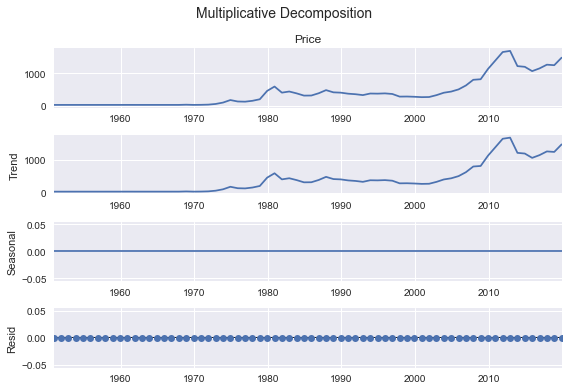

In [14]:
results = seasonal_decompose(df.Price, model='additive')

results.plot().suptitle('Multiplicative Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

In [15]:
adf_check(df.Price)

ADF Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : -0.367190
p-value: 0.915434 - Non-stationary
Critical Values:
	1%: -3.541
	5%: -2.909
	10%: -2.592


Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò Í≥ÑÏ†àÏÑ±Ïù¥ Î≥¥Ïù¥ÏßÄ ÏïäÏúºÎØÄÎ°ú seasonalityÎ•º Î∂ÄÏó¨ÌïòÍ∏∞ ÏúÑÌï¥ Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Time Series  Î∂ÑÌï¥

In [16]:
np.random.seed(101)

time = np.arange(500)
# white noise ÏÉùÏÑ±
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))
    
trend = time + stationary * 50

seasonality = 10 + np.sin(time) * 10

trend_seasonality = trend + seasonality * 10 + stationary

In [17]:
from datetime import datetime, timedelta
start_date = datetime(2000, 1, 1)
dates = []
for i in range(len(trend_seasonality)):
    dates.append(start_date + timedelta(i))

In [18]:
series_trend = pd.Series(trend_seasonality, index=dates)

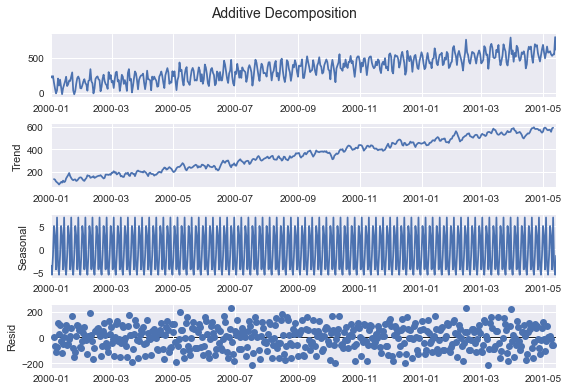

In [19]:
results = seasonal_decompose(series_trend, model='additive')

results.plot().suptitle('Additive Decomposition', fontsize=14)

plt.tight_layout()
plt.show()